In [3]:
import os
par_dir = os.path.abspath(os.path.join(os.getcwd(),os.pardir))
os.chdir(par_dir)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from kl_divergence.linear import gamma_linear
from kl_divergence.sigmoid2 import gamma_sigmoid_fixed
from kl_divergence.cyclical import gamma_cyclical
from kl_divergence.cosine import gamma_cosine

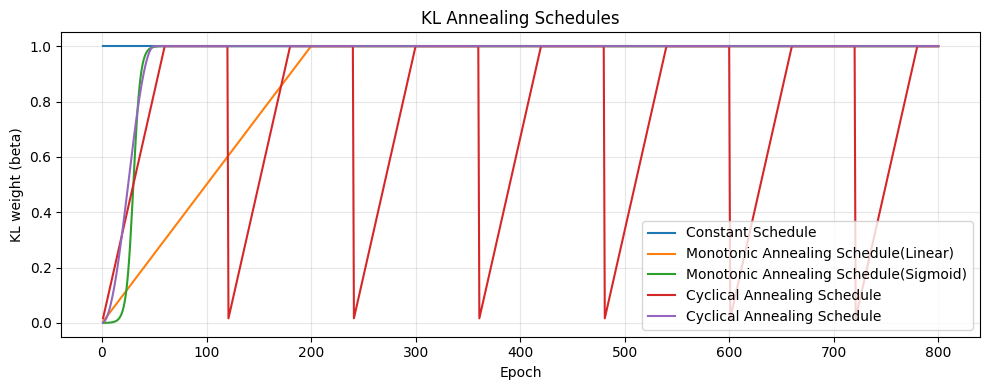

In [18]:
import numpy as np
import matplotlib.pyplot as plt

epochs = 800

g_constant = np.array([1 for _ in range(1,epochs+1)])
g_linear  = np.array([gamma_linear(e,  gamma_max=1, warmup_epochs=200) for e in range(1, epochs+1)])
g_sigmoid = np.array([gamma_sigmoid_fixed(e, gamma_max=1.0,
                            center=30,
                            steepness=0.3,
                            fix_epoch=60) for e in range(1, epochs+1)])
g_cyc     = np.array([gamma_cyclical(e, gamma_max=1, cycle_len=120, ratio=0.5) for e in range(1, epochs+1)])
g_cosine = np.array([gamma_cosine(e, gamma_max=1, warmup_epochs=50) for e in range(1, epochs+1)])
plt.figure(figsize=(10,4))
plt.plot(range(1, epochs+1), g_constant,  label="Constant Schedule")
plt.plot(range(1, epochs+1), g_linear,  label="Monotonic Annealing Schedule(Linear)")
plt.plot(range(1, epochs+1), g_sigmoid, label="Monotonic Annealing Schedule(Sigmoid)")
plt.plot(range(1, epochs+1), g_cyc,     label="Cyclical Annealing Schedule")
plt.plot(range(1, epochs+1), g_cosine,     label="Cyclical Annealing Schedule")
plt.xlabel("Epoch")
plt.ylabel("KL weight (beta)")
plt.title("KL Annealing Schedules")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
